<a href="https://colab.research.google.com/github/Jasper-Hewitt/final_project_elections/blob/main/Roberta_train_postest_downsample_1epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 Init

## 0-1 Install Dependences

In [1]:
!pip install datasets
!pip install transformers
!pip install --upgrade xlrd
!pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 452 kB 13.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 182 kB 62.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132 kB 76.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 213 kB 69.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 127 kB 73.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

In [2]:
! rm -rf output

## 0-2 Parameters

In [3]:
number_classes = 2
epoch = 1


model_tokenizer = "hfl/chinese-roberta-wwm-ext"
model_pretran = "hfl/chinese-roberta-wwm-ext" 
model_output = "Jiabo/Roberta_Chinese_sentiment"


# 1 Load Data and tokenize

### 1.1 Load dataset

In [4]:
! wget -nc https://github.com/Jasper-Hewitt/final_project_elections/blob/main/data/train/usual_train.xlsx?raw=true
! wget -nc https://github.com/Jasper-Hewitt/final_project_elections/blob/main/data/eval/usual_eval_labeled.xlsx?raw=true
! wget -nc https://github.com/Jasper-Hewitt/final_project_elections/blob/main/data/test/df_combined_trad.xlsx?raw=true

--2022-12-30 05:41:59--  https://github.com/Jasper-Hewitt/final_project_elections/blob/main/data/train/usual_train.xlsx?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Jasper-Hewitt/final_project_elections/raw/main/data/train/usual_train.xlsx [following]
--2022-12-30 05:41:59--  https://github.com/Jasper-Hewitt/final_project_elections/raw/main/data/train/usual_train.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Jasper-Hewitt/final_project_elections/main/data/train/usual_train.xlsx [following]
--2022-12-30 05:42:00--  https://raw.githubusercontent.com/Jasper-Hewitt/final_project_elections/main/data/train/usual_train.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199

In [5]:
map_dict = dict()

if number_classes == 6:
    map_dict['angry']=0
    map_dict['happy']=1
    map_dict['neutral']=2
    map_dict['surprise']=3
    map_dict['sad']=4
    map_dict['fear']=5
else:
    map_dict['angry']=0 #neg
    map_dict['happy']=1 #pos
    map_dict['neutral']=3 #ignore
    map_dict['surprise']=3 #ignore
    map_dict['sad']=0 #neg
    map_dict['fear']=0 #neg
    map_dict['negative']=0 #neg
    map_dict['positive']=1 #pos


len(map_dict)

8

In [6]:
# ['neutral', 'fear', 'anger', 'posiitive', 'positive', 'suprise',
#       'surprise', 'sad', 'negative', 'angry', 'happy', 'neural']


ici_map_dict = dict()

if number_classes == 6:

    ici_map_dict['angry']=0
    ici_map_dict['anger']=0
    ici_map_dict['positive']=1
    ici_map_dict['posiitive']=1
    ici_map_dict['happy']=1
    ici_map_dict['neutral']=2
    ici_map_dict['neural']=2
    ici_map_dict['surprise']=3
    ici_map_dict['suprise']=3
    ici_map_dict['sad']=4
    ici_map_dict['negative']=4
    ici_map_dict['fear']=5
else:
    ici_map_dict['positive']=1 #pos
#    ici_map_dict['posiitive']=1 #pos
#    ici_map_dict['neutral']=3 #ignore
#    ici_map_dict['surprise']=3 #ignore
    ici_map_dict['negative']=0 #neg
 

len(ici_map_dict)

2

In [7]:
import pandas as pd

training_pd = pd.read_excel('/content/usual_train.xlsx?raw=true',
                            names=['text', 'label'])

training_pd['label'] = training_pd['label'].map(map_dict).astype('int')
training_pd.head(5)

text  label
1                  Ê∞îÊ≠ªÂßêÂßê‰∫ÜÔºåÂø´‰∫åÊòØÈòµ‰∫°‰∫ÜÂêóÔºåÂ∞ºÁéõÔºå‰∏Ä‰∏™ÂçäÂ∞èÊó∂ËøáÂéª‰∫Ü‰πüÊ≤°‰∏äËΩ¶      0
2               Â¶ûÂ¶ûÂïäÔºå‰ªäÂ§©ÂèàÊâøÂäû‰∫Ü‰∏Ä‰∏™ÂèëÊñáÁôªËÆ∞ÊñáÂè∑ÊòØ126~Âòª~‰πà‰πàÂìí~ÊôöÂÆâÂìü      1
3               ËøôÈáåËøòÂÄºÂæóÊ≥®ÊÑèÂè¶‰∏Ä‰∏™‰∫ãÂÆûÔºåÂ∞±ÊòØÂº†Èû†Â≠òÂéüÊúâ‰∏Ä‰∏™‰∏úÊ∫™ËçâÂ†Ç‰∏∫ÂÖ∂ËØª‰π¶Â§Ñ„ÄÇ      3
4  ËøôÂú®ÂâçÂçéÁ∫¶ÂõΩÂÆ∂(Â∞§ÂÖ∂ÊòØ‰∏úÂæ∑)‰ΩøÁî®R-73ÁöÑÈ¶ñÊ¨°ËÅîÂêàÊºî‰π†ÊúüÈó¥ÔºåË¢´‰∏Ä‰∫õÂåóÁ∫¶ÁªÑÁªáÁöÑÈ£ûË°åÂëòÊâÄËØÅÂÆû„ÄÇ      3
5                               TinyThief‰∏äwii‰∫ÜÔºüÔºÅ      3

In [8]:
if number_classes == 6:
     pass
else:
    training_pd = training_pd[training_pd['label'] != 3]

training_pd = training_pd.dropna().reset_index(drop=True)

In [9]:
training_pd['label'].value_counts()

0    14553
1     5378
Name: label, dtype: int64

### 1.1.1 get more positive data

In [10]:
#usual_test
! wget -nc https://github.com/Jasper-Hewitt/final_project_elections/blob/main/data/test/usual_test_labeled.xls?raw=true

--2022-12-30 05:42:05--  https://github.com/Jasper-Hewitt/final_project_elections/blob/main/data/test/usual_test_labeled.xls?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Jasper-Hewitt/final_project_elections/raw/main/data/test/usual_test_labeled.xls [following]
--2022-12-30 05:42:05--  https://github.com/Jasper-Hewitt/final_project_elections/raw/main/data/test/usual_test_labeled.xls
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Jasper-Hewitt/final_project_elections/main/data/test/usual_test_labeled.xls [following]
--2022-12-30 05:42:05--  https://raw.githubusercontent.com/Jasper-Hewitt/final_project_elections/main/data/test/usual_test_labeled.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133,

In [11]:
#get data from usual_test
tezt_pd = pd.read_excel('/content/usual_test_labeled.xls?raw=true',
                            names=['number','text', 'label'])

tezt_pd['label'] = tezt_pd['label'].map(map_dict).astype('int')
tezt_pd['label'].value_counts()

0    2618
3    1364
1    1018
Name: label, dtype: int64

In [12]:
tezt_pd=tezt_pd[['text', 'label']]
tezt_pd = tezt_pd[tezt_pd['label'] != 3]
tezt_pd = tezt_pd.dropna().reset_index(drop=True)
tezt_pd['label'].value_counts()

0    2618
1    1018
Name: label, dtype: int64

In [13]:
pos_test_pd = tezt_pd.loc[tezt_pd['label'] == 1]  
pos_test_pd['label'].value_counts()

1    1018
Name: label, dtype: int64

In [14]:
#add positive data to training_pd
training_pd=training_pd.append(pos_test_pd)
training_pd['label'].value_counts()

0    14553
1     6396
Name: label, dtype: int64

In [15]:
training_pd

text  label
0                         Ê∞îÊ≠ªÂßêÂßê‰∫ÜÔºåÂø´‰∫åÊòØÈòµ‰∫°‰∫ÜÂêóÔºåÂ∞ºÁéõÔºå‰∏Ä‰∏™ÂçäÂ∞èÊó∂ËøáÂéª‰∫Ü‰πüÊ≤°‰∏äËΩ¶      0
1                      Â¶ûÂ¶ûÂïäÔºå‰ªäÂ§©ÂèàÊâøÂäû‰∫Ü‰∏Ä‰∏™ÂèëÊñáÁôªËÆ∞ÊñáÂè∑ÊòØ126~Âòª~‰πà‰πàÂìí~ÊôöÂÆâÂìü      1
2                        ÊØèÂ§©ÈÉΩ‰ª•Á¥ßÂº†ÁöÑÂøÉÊÉÖÂ∑•‰ΩúÔºåÁúüÁöÑÊòØÂ§™Á¥ØÔºåÂ§™‰∏çÊîæÊùæ‰∫ÜÔºåÊÉ≥Ë¶ÅÁàÜÂèë‰∏Ä‰∏ã      0
3     ËØ≠ÊñáÂÜõÔºåÊï∞Â≠¶ÂÜõÔºåËã±ËØ≠ÂÜõÔºåÁâ©ÁêÜÂÜõÔºåÊîøÊ≤ªÂÜõÔºåÂéÜÂè≤ÂÜõÔºåÁîüÁâ©ÂÜõÔºåÂú∞ÁêÜÂÜõÔºåÂÖ´ÁßëËÅîÂÜõÔºå‰æµÁäØÊàëÁè≠ÔºåÊàëÁè≠ÊàòË¥•...      0
4                              Êàë‰∏çÊòØ‰∏Ä‰∏™‰ºòÁßÄÁöÑÊºîÂëò‚Ä¶‚Ä¶‰∏çËÉΩÂæÆÁ¨ëÁùÄÊóÅËßÇ‰Ω†‰ª¨Âπ∏Á¶è„ÄÇ      0
...                                                 ...    ...
3607                           Ê≤°ÊúâÁúãËøáÈÇ£‰πàÂπ≤ÂáÄÁöÑÂ§úÁ©∫ÔºåÊ∑±Âú≥ÁöÑÂ§úÁúüÁöÑÂæàÁæé„ÄÇÊôöÂÆâÔºÅ      1
3616                                    ‰∏∫‰ªÄ‰πàÂèØ‰ª•ÈÅáËßÅ‰Ω†‰ª¨ËÆ©ÊàëÈÇ£‰πàÂøÉÂä®      1
3617            ÊàëÁöÑÁé´Áë∞Âè™ÊòØ‰∏ÄÊúµÊôÆÈÄöÁöÑÁé´Áë∞ÔºåÂèØÊòØÂØπÊàëÊù•ËØ¥Â•πÊòØÂÖ®ÂÆáÂÆôÂîØ‰∏Ä‰∏ÄÊúµÁé´Áë∞---„ÄäÂ∞èÁéãÂ≠ê„Äã      1
3630                                    Ëá™Âè§‚ÄúÂêçËå∂ËóèÂêçÂ±±ÔºåÂêçÂ±±Âá∫ÂêçËå∂„ÄÇ      1
3635                                   Êñ∞ÁöÑ‰∏ÄÂ§©ÂèàÂºÄÂßãÂï¶Â∞èÂõ¢Â≠êÊù•ÈÄÅÊó©ÂÆâÂï¶      1

[20949 rows x 2 columns]

In [16]:
from sklearn.utils import resample
import pandas as pd


# Split the data into features and labels
X = training_pd.drop(columns='label')
y = training_pd['label']

# Separate the majority and minority classes
df_majority = X[y==0]
df_minority = X[y==1]

# Downsample the majority class
df_majority_downsampled = resample(df_majority, 
                                    replace=False,    # sample without replacement
                                    n_samples=df_minority.shape[0], # to match minority class
                                    random_state=42) # reproducible results

# Reset the indices of the dataframes with the drop parameter set to True
df_majority_downsampled = df_majority_downsampled.reset_index(drop=True)
df_minority = df_minority.reset_index(drop=True)

# Combine the minority class with the downsampled majority class
X_downsampled = pd.concat([df_majority_downsampled, df_minority])
y_downsampled = pd.concat([pd.Series([0]*df_majority_downsampled.shape[0]), pd.Series([1]*df_minority.shape[0])])

# Store the downsampled dataset back in the training_pd variable
training_pd = pd.concat([X_downsampled, y_downsampled], axis=1)




In [25]:
training_pd = training_pd.rename(columns={0: 'label'})


In [24]:
print(training_pd.columns)

Index(['text', 0], dtype='object')


In [26]:
# duplicateRows = training_pd[training_pd.duplicated()]

text  label
0                         Âæà‰∏çËàíÊúçÔºåÊòéÊòéÊòØÁõ∏ÂêåÁöÑÊó∂Èó¥ÔºåÁªìÊûúÂç¥ÊòØÂ§©Â£§‰πãÂà´ÔºåÂà´ÁêÜÊàëÂèØ‰ª•Âêó      0
1     ‰∏ÄÂ§©Â§©Â∑•‰ΩúÂøôÂæóÂÉèÁãó‚Ä¶‚Ä¶ÂÅö‰∫∫ÈöæÂæóÂÉèÈ¨º‚Ä¶‚Ä¶Ë¢´‰∏äÈù¢È™ÇÂæóÂÉèÂ≠ôÂ≠ê‚Ä¶‚Ä¶Âè™Êúâ‰ºëÂÅáÁ¶ªÂæóÊúÄËøúÂÉèÁ´•ËØù‚Ä¶‚Ä¶‰∫∫ÁîüÁöÑÊÑè...      0
2                 ÂëµÂëµ‚Ä¶‚Ä¶‚ÄúÈâ¥‰∫éÊ°àÂèëÂêéÂùá‰∏ªÂä®ÊäïÊ°à‰æùÊ≥ï‰∫à‰ª•‰ªéËΩªÂ§ÑÁΩö‚ÄùËøôÊòØÂ§öÈºìÂä±Âà´‰∫∫ÁäØÊ°àÁöÑËäÇÂ•èÂêß      0
3                         ÈïøËÄÅËôΩÁÑ∂ÂåÖÁªèÊ≤ßÊ°ëÔºåÂèØËøôÊ†∑ÁöÑ‰∫ã‰ªéÊù•Ê≤°ÊúâÈÅáÂà∞ËøáÔºåÊàêÂ§©ÂÜ•ÊÄùËã¶ÊÉ≥„ÄÇ      0
4               Êò®ÊôöÂºÄÂßãÂ∞±‰ΩéÊ∞îÂéãÔºÅÂÖàÊòØÂêµÊû∂ÔºåÁÑ∂Âêé‰∏ÄËßâËµ∑Êù•ÔºåË¶ÅÊê¨ÂäûÂÖ¨ÂÆ§Ôºå‰∏ãÂçàÂèàÈÄöÁü•ÊàëÊòéÂ§©ÂéªÂá∫Â∑ÆÔºÅ      0
...                                                 ...    ...
6391                           Ê≤°ÊúâÁúãËøáÈÇ£‰πàÂπ≤ÂáÄÁöÑÂ§úÁ©∫ÔºåÊ∑±Âú≥ÁöÑÂ§úÁúüÁöÑÂæàÁæé„ÄÇÊôöÂÆâÔºÅ      1
6392                                    ‰∏∫‰ªÄ‰πàÂèØ‰ª•ÈÅáËßÅ‰Ω†‰ª¨ËÆ©ÊàëÈÇ£‰πàÂøÉÂä®      1
6393            ÊàëÁöÑÁé´Áë∞Âè™ÊòØ‰∏ÄÊúµÊôÆÈÄöÁöÑÁé´Áë∞ÔºåÂèØÊòØÂØπÊàëÊù•ËØ¥Â•πÊòØÂÖ®ÂÆáÂÆôÂîØ‰∏Ä‰∏ÄÊúµÁé´Áë∞---„ÄäÂ∞èÁéãÂ≠ê„Äã      1
6394                                    Ëá™Âè§‚ÄúÂêçËå∂ËóèÂêçÂ±±ÔºåÂêçÂ±±Âá∫ÂêçËå∂„ÄÇ      1
6395                                   Êñ∞ÁöÑ‰∏ÄÂ§©ÂèàÂºÄÂßãÂï¶Â∞èÂõ¢Â≠êÊù•ÈÄÅÊó©ÂÆâÂï¶      1

[12792 rows x 2 columns]

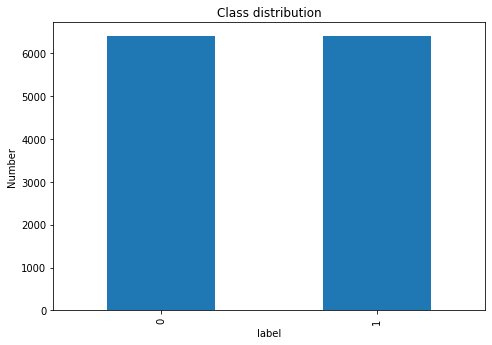

In [27]:
import matplotlib.pyplot as plt

counts = training_pd.groupby("label").size()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Create a bar plot
counts.plot(kind="bar")

# Show the plot
ax.set_ylabel('Classes')
ax.set_ylabel('Number')
ax.set_title('Class distribution')
plt.show()

### 1.1.1 (end) code continued

In [28]:
evaluation_pd = pd.read_excel('/content/usual_eval_labeled.xlsx?raw=true')[['ÊñáÊú¨','ÊÉÖÁª™Ê†áÁ≠æ']] 
evaluation_pd = evaluation_pd.rename(columns={'ÊñáÊú¨': 'text', 'ÊÉÖÁª™Ê†áÁ≠æ': 'label'})

evaluation_pd['label'] = evaluation_pd['label'].map(map_dict).astype('int')
evaluation_pd.head(5)

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


text  label
0                                   ÊâÄ‰ª•Ê≥®ÂÆöÊàëËøôËæàÂ≠êÊòØÂÅö‰∏ç‰∫ÜÂïÜ‰∫∫Â¶àËõã      0
1                         Êó†ËÆ∫ÊòØÂøÉÊÉÖÂ§ö‰πà‰ΩéÊ≤âÁöÑÂ§úÊôöÔºåÂ§©ÂÖâÂ§ß‰∫ÆÂêéÈÉΩÊòØÂ¥≠Êñ∞ÁöÑÂºÄÂßã„ÄÇ      1
2                                    Â∏ΩÂ≠êÊÄé‰πàÂ∞±ÂèòÁªøËâ≤Âπ∏Â•ΩÂè™ÊòØËØï‰∏Ä‰∏ã      0
3  ‰∏çÊÉ≥ÂΩì‰∏™Â•Ω‰∫∫ÔºåÂ•Ω‰∫∫ÁöÑËÉåÂêéÊúâÂ§öÂ∞ëÁöÑÂøÉÈÖ∏ÂÆ≥ÊÄïÂñùÈÜâÈÖíÁöÑ‰∫∫ÔºåÂÆ≥ÊÄï‰ªñ‰ª¨ÂÅöÂá∫Êó†Ê≥ïÊåΩÂõûÁöÑ‰∫ãÊÉÖÊòØÁúüÁöÑ‰ºöÈÜâ‰πàÔºü...      3
4                      ‰∏ÄÁßçÁà±ÊòØ‰Ω†ÂèØ‰ª•‰∏∫Â•πÂéªÊ≠ªÔºõËøòÊúâ‰∏ÄÁßçÁà±ÊòØÂæó‰∏∫‰Ω†Áà±ÁöÑ‰∫∫Â•ΩÂ•ΩÊ¥ªÁùÄ„ÄÇ      1

In [29]:
if number_classes == 6:
    pass
else:
    evaluation_pd = evaluation_pd[evaluation_pd['label'] != 3]

evaluation_pd = evaluation_pd.dropna().reset_index(drop=True)

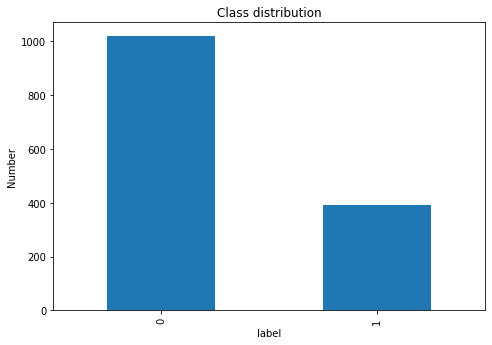

In [30]:
import matplotlib.pyplot as plt

counts = evaluation_pd.groupby("label").size()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Create a bar plot
counts.plot(kind="bar")

# Show the plot
ax.set_ylabel('Classes')
ax.set_ylabel('Number')
ax.set_title('Class distribution')
plt.show()

In [31]:
testing_pd = pd.read_excel('/content/df_combined_trad.xlsx?raw=true')

testing_pd = testing_pd[['text', 'cya_check_3']]
testing_pd = testing_pd.rename(columns={'cya_check_3':'label'})
testing_pd = testing_pd[(testing_pd['label'] == 'negative') | (testing_pd['label'] == 'positive')]


# align labels
# testing_pd['label'].unique()
testing_pd['label'] = testing_pd['label'].str.lower()
testing_pd['label'] = testing_pd['label'].str.split(' ', 0, expand = True)[0]
testing_pd['label'] = testing_pd['label'].str.split(',', 0, expand = True)[0]
testing_pd['label'] = testing_pd['label'].map(ici_map_dict).astype('int')

testing_pd.shape

(265, 2)

In [32]:
testing_pd = testing_pd[(testing_pd['label'] == 0) | (testing_pd['label'] == 1)]

testing_pd = testing_pd[~testing_pd['text'].str.contains('a href', regex=True)]

# TODO: we should remove non-Chinese characters in 'text column'
import re
html_pattern = "<(?:\"[^\"]*\"['\"]*|'[^']*'['\"]*|[^'\">])+>"
http_pattern = "http\S+"
image_pattern = "<img\s[^>]*?src\s*=\s*['\"]([^'\"]*?)['\"][^>]*?>" 
title_pattern = "[„Äê|„Ää*„Äë|„Äã]"
title_pattern_1 = "(?=„Äê)(.*)(?<=„Äë)"
title_pattern_2 = "(?=„Ää)(.*)(?<=„Äã)"
link_pattern="ÁΩëÈ°µÈìæÊé•"
span_pattern='<span.*?>(.+?)</span>'

#we have to find a way to delete the entire <span> tag. some posts will end up with only 2 or 3 characters after that. We can drop them. 



testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True).replace(title_pattern_1,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)

if number_classes == 6:
    pass
else:
    testing_pd = testing_pd[testing_pd['label'] != 3]

testing_pd = testing_pd.dropna().reset_index(drop=True)

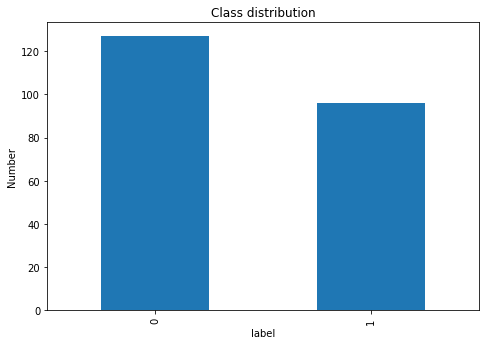

In [33]:
import matplotlib.pyplot as plt

counts = testing_pd.groupby("label").size()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Create a bar plot
counts.plot(kind="bar")

# Show the plot
ax.set_ylabel('Classes')
ax.set_ylabel('Number')
ax.set_title('Class distribution')
plt.show()

In [34]:
num_label = len(evaluation_pd['label'].unique())
num_label

2

In [35]:
testing_pd

text  label
0    ÂõΩÊ∞ëÂÖöÂè∞ÂåóÂ∏ÇÈïøÂÄôÈÄâ‰∫∫Ëíã‰∏áÂÆâÁöÑÂ§™Â§™Áü≥Ëà´‰∫ò‰∏äÂë®Ëµ∑ÂºÄÂßãÂ∏ÆÂøôÂàÜÊëäÂ∏ÇÂú∫Êâ´Ë°óË°åÁ®ãÔºå‰ªäÂ§©‰∏äÂçàÂâçÂæÄÈªÑÂõΩÊ¢ÅËµÑÊ∑±...      1
1    ÈïøÊúüÂÖ≥ÂøÉÂè∞ÊπæÂ∞ëÂ≠êÂåñÈóÆÈ¢òÔºå8Êúà25Êó•‰πüÊõæÂèëÂ∏É‚ÄúËÇ≤ÂÑøÁîüÂÖªÊîøÁ≠ñ‚ÄùÁöÑÂõΩÊ∞ëÂÖöÂè∞ÂåóÂ∏ÇÈïøÂÄôÈÄâ‰∫∫Ëíã‰∏áÂÆâÔºå‰º†Âá∫...      1
2    ËµÑÊ∑±Â™í‰Ωì‰∫∫Âë®ÁéâËîªËøëÊúüÂ§ßÂäõÊîØÊåÅÊ∞ëËøõÂÖöÂè∞ÂåóÂ∏ÇÈïøÂÄôÈÄâ‰∫∫ÈôàÊó∂‰∏≠Ôºå‰∏∫Ê≠§Â§öÊ¨°ÂêëÂõΩÊ∞ëÂÖöÂÄôÈÄâ‰∫∫Ëíã‰∏áÂÆâÂºÄÁÇÆÔºåËøò...      0
3                             Ëíã‰∏áÂÆâÁß∞Ôºå‰ªñÊòØ‚ÄúÊ≠£ËìùÂÜõ‚ÄùÔºåÂëºÂêÅËìùËê•Âõ¢ÁªìÊîØÊåÅ„ÄÇ ‚Äã      1
4    Êó•Êú¨Â≠¶ËÄÖÈ¢ÑÊµãÔºåËøôÊ¨°Âè∞ÂåóÂ∏ÇÈïøÈÄâ‰∏æÔºåÂõΩÊ∞ëÂÖöÂÄôÈÄâ‰∫∫Ëíã‰∏áÂÆâÂèØËÉΩÂΩìÈÄâÔºõÊ∞ëËøõÂÖöÂè∞ÂåóÂ∏ÇÈïøÂÄôÈÄâ‰∫∫ÈôàÊó∂‰∏≠‰ªäÂèóËÆø...      1
..                                                 ...    ...
218             ËØ¥‰ªÄ‰πàËíãÁªèÂõΩ‰∏çÊòØËíã‰ªãÁü≥‰∫≤ÁîüÁöÑÔºåËíã‰ªãÁü≥Ê≤°ÊúâÂêéÔºåÁ∫ØÂ±ûÊâØÊ∑°ÔºåËíãÂèãÊüèÂíåËíã‰ªãÁü≥ÂæàÂÉèÂ•ΩÂêó      0
219  ÂõΩÊ∞ëÂÖöÂè∞ÂåóÂ∏ÇËÆÆÂëòÂæêÂ∑ßËäØÊó•ÂâçÂÖ¨Â∏ÉÊ∞ëËøõÂÖöÂè∞ÂåóÂ∏ÇÈïøÂèÇÈÄâ‰∫∫ÈôàÊó∂‰∏≠Á´ûÈÄâÂäûÂÖ¨ÂÆ§ÂàÜÊú∫ÈÄöËÆØÂΩïÔºåÂêçÂçï‰∏≠Á´üÊúâËÆ∏Â§ö...      0
220  2022/9/17 Âë®ÁéâËîªÊîªÊìäÊÖàÊøüÂÆåÂÜçÊîªÊìäËî£Ëê¨ÂÆâÔºåËî£ÊáâÁ†≤ÁÅ´ÂÖ®ÈñãÂõûÊìäÔºåË¥èÂõûËóçÁáüÁöÑÊêñÊì∫ÈÅ∏Ê∞ëËÆäËâ≤Â™í...      0
221  ËµÑÊ∑±Â™í‰Ωì‰∫∫Âë®ÁéâËîªÊó•ÂâçÊîªÂáªÂõΩÊ∞ëÂÖöÂè∞ÂåóÂ∏ÇÈïøÂÄôÈÄâ‰∫∫Ëíã‰∏áÂÆâÔºåÊåáÂÖ∂Áà∂ÁªØÈóªÂ•≥‰∏ªËßíÊòØÂº†Ê∑ëÂ®üÔºåËøòÂú®ÈÅ≠ÊåâÈìÉÁî≥Âëä...      0
222                                  È¢ùÔºüÔºüÔºüËøôÊòØËíã‰∏áÂÆâÁöÑÁ´ûÈÄâÂõ¢ÈòüÔºüÔºüÔºü      0

[223 rows x 2 columns]

In [36]:
from datasets import Dataset, DatasetDict

weibo_dict = {'train' : Dataset.from_pandas(training_pd),
               'eval' : Dataset.from_pandas(evaluation_pd),
               'test' : Dataset.from_pandas(testing_pd)}
              # 'eval' : Dataset.from_pandas(evaluation_pd),

#weibo_dict = {'train' : Dataset.from_pandas(training_pd),
#              'eval' : Dataset.from_pandas(evaluation_pd)}

#weibo_dict = {'eval' : Dataset.from_pandas(evaluation_pd)}

        

weibo_ds = DatasetDict(weibo_dict)

In [37]:
weibo_ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 12792
    })
    eval: Dataset({
        features: ['text', 'label'],
        num_rows: 1410
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 223
    })
})

### 1.2 Data Tokenize by wmmBERT

In [38]:
from transformers import AutoTokenizer

In [39]:
tokenizer = AutoTokenizer.from_pretrained(model_tokenizer)

Downloading:   0%|          | 0.00/19.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/689 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/269k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [40]:
def tokenize_function(examples):
    return tokenizer(examples["text"], 
                     padding="max_length", 
                     truncation=True, 
                     max_length=500)

tokenized_datasets = weibo_ds.map(tokenize_function, batched=True)

  0%|          | 0/13 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [41]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 12792
    })
    eval: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1410
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 223
    })
})

# 2 Fine-Tuning, benchmarking and visualization

In [42]:
# small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
# small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))
full_train_dataset = tokenized_datasets["train"]
full_eval_dataset = tokenized_datasets["eval"]
full_test_dataset = tokenized_datasets["test"]

## 2.1 Fine-tuning using wmmBERT

In [43]:
from transformers import AutoModelForSequenceClassification


model = AutoModelForSequenceClassification.from_pretrained(model_pretran, 
                                                           num_labels=num_label)

Downloading:   0%|          | 0.00/412M [00:00<?, ?B/s]

Some weights of the model checkpoint at hfl/chinese-roberta-wwm-ext were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model che

In [44]:
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

<ipython-input-44-e1ee7db0da93>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [45]:
from transformers import TrainingArguments

training_args = TrainingArguments(num_train_epochs=epoch,
                                  output_dir="output")

In [46]:
from transformers import Trainer

trainer = Trainer(
    model=model, 
    args=training_args, 
    train_dataset=full_train_dataset, 
    eval_dataset=full_eval_dataset,
    compute_metrics=compute_metrics,
)

In [47]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 12792
  Num Epochs = 1
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1599
  Number of trainable parameters = 102269186


Saving model checkpoint to output/checkpoint-500
Configuration saved in output/checkpoint-500/config.json
Model weights saved in output/checkpoint-500/pytorch_model.bin
Saving model checkpoint to output/checkpoint-1000
Configuration saved in output/checkpoint-1000/config.json
Model weights saved in output/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to output/checkpoint-1500
Configuration saved in output/checkpoint-1500/config.json
Model weights saved in output/checkpoint-1500/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=1599, training_loss=0.3210896831366925, metrics={'train_runtime': 1185.8529, 'train_samples_per_second': 10.787, 'train_steps_per_second': 1.348, 'total_flos': 3286832636880000.0, 'train_loss': 0.3210896831366925, 'epoch': 1.0})

## 2.2 Evaluation and Testing

In [48]:
import numpy as np

trainer.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1410
  Batch size = 8


{'eval_loss': 0.3100419342517853,
 'eval_accuracy': 0.902127659574468,
 'eval_runtime': 46.6015,
 'eval_samples_per_second': 30.257,
 'eval_steps_per_second': 3.798,
 'epoch': 1.0}

In [49]:
pred = trainer.predict(test_dataset=full_test_dataset)

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 223
  Batch size = 8


In [50]:
pred.metrics

{'test_loss': 0.5358829498291016,
 'test_accuracy': 0.8161434977578476,
 'test_runtime': 7.4563,
 'test_samples_per_second': 29.908,
 'test_steps_per_second': 3.755}

In [51]:
# results = trainer.predict(test_dataset=full_test_dataset)

## 2.3 Push model to HF

In [52]:
!huggingface-cli login




    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
    
Token: Traceback (most recent call last):
  File "/usr/lib/python3.8/getpass.py", line 77, in unix_getpass
    passwd = _raw_input(prompt, stream, input=input)
  File "/usr/lib/python3.8/getpass.py", line 146, in _raw_input
    line = input.readline()
KeyboardInterrupt

During handling of the above exception, an

In [53]:
# https://huggingface.co/docs/transformers/model_sharing
model.push_to_hub(model_output)

ValueError: ignored